# 一、数据探索

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scipy.stats as st
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error
#显示所有列
pd.set_option('display.max_columns',None)

In [2]:
#step1.导入数据并合并
train_data = pd.read_csv('G:/shuju/tianchi/二手车交易价格/used_car_train_20200313.csv',sep = ' ')
test_data = pd.read_csv('G:/shuju/tianchi/二手车交易价格/used_car_testB_20200421.csv',sep = ' ')
train_data['origin'] = 'train'
test_data['origin']= 'test'
all_data = pd.concat([train_data,test_data],axis = 0,ignore_index = True,sort=False)
all_data.head().append(all_data.tail())

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,origin
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,0,0,20160404,1850.0,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,train
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,-,4366,0,0,20160309,3600.0,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,train
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,0.0,2806,0,0,20160402,6222.0,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,train
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,0.0,434,0,0,20160312,2400.0,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,train
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,0.0,6977,0,0,20160313,5200.0,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,train
199995,249995,111443,20041005,4.0,4,0.0,NaN,1.0,150,15.0,-,5564,0,0,20160309,NaN,46.321013,-3.304401,0.073363,-0.622359,-0.778349,0.263668,0.000292,0.141804,0.076393,0.039272,2.072901,-2.531869,1.716978,-1.063437,0.326587,test
199996,249996,152834,20130409,65.0,1,0.0,0.0,0.0,179,4.0,0.0,5220,0,0,20160323,NaN,48.086547,-3.318641,0.965881,-2.672160,0.357440,0.255310,0.000991,0.155868,0.108425,0.067841,1.358504,-3.290295,4.269809,0.140524,0.556221,test
199997,249997,132531,20041211,4.0,4,0.0,0.0,1.0,147,12.5,0.0,3795,0,0,20160316,NaN,46.145279,-3.305263,-0.015283,-0.288329,-0.687112,0.262933,0.000318,0.141872,0.071968,0.042966,2.165658,-2.417885,1.370612,-1.073133,0.270602,test
199998,249998,143405,20020702,40.0,1,4.0,0.0,1.0,176,15.0,0.0,61,0,0,20160327,NaN,45.507088,-3.197006,-1.141252,-0.434930,-1.845040,0.282106,0.000023,0.067483,0.067526,0.009006,2.030114,-2.939244,0.569078,-1.718245,0.316379,test
199999,249999,78202,20090708,32.0,8,1.0,0.0,0.0,0,3.0,0.0,4158,0,0,20160401,NaN,44.289471,4.181452,0.547068,-0.775841,1.789601,0.231449,0.103947,0.096027,0.062328,0.110180,-3.689090,2.032376,0.109157,2.202828,0.847469,test


In [3]:
#step2.查看缺失值、数据信息
all_data.info()
all_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             200000 non-null  int64  
 1   name               200000 non-null  int64  
 2   regDate            200000 non-null  int64  
 3   model              199999 non-null  float64
 4   brand              200000 non-null  int64  
 5   bodyType           193990 non-null  float64
 6   fuelType           188396 non-null  float64
 7   gearbox            192051 non-null  float64
 8   power              200000 non-null  int64  
 9   kilometer          200000 non-null  float64
 10  notRepairedDamage  200000 non-null  object 
 11  regionCode         200000 non-null  int64  
 12  seller             200000 non-null  int64  
 13  offerType          200000 non-null  int64  
 14  creatDate          200000 non-null  int64  
 15  price              150000 non-null  float64
 16  v_

SaleID                   0
name                     0
regDate                  0
model                    1
brand                    0
bodyType              6010
fuelType             11604
gearbox               7949
power                    0
kilometer                0
notRepairedDamage        0
regionCode               0
seller                   0
offerType                0
creatDate                0
price                50000
v_0                      0
v_1                      0
v_2                      0
v_3                      0
v_4                      0
v_5                      0
v_6                      0
v_7                      0
v_8                      0
v_9                      0
v_10                     0
v_11                     0
v_12                     0
v_13                     0
v_14                     0
origin                   0
dtype: int64

In [4]:
#step2.EDA
#数据探索，查看列的取值
category_feature = ['name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
           'gearbox', 'kilometer', 'notRepairedDamage', 'regionCode',
           'seller', 'offerType', 'creatDate']
for fea in category_feature:
    print(fea + "的特征分布如下：")
    print("{}特征有个{}不同的值".format(fea,all_data[fea].nunique()))
    print(all_data[fea].value_counts())

name的特征分布如下：
name特征有个128660不同的值
387       376
55        373
708       367
1541      349
203       311
         ... 
13908       1
11863       1
30300       1
28255       1
151818      1
Name: name, Length: 128660, dtype: int64
regDate的特征分布如下：
regDate特征有个3898不同的值
20000008    235
20000011    213
20000002    211
20000009    206
20000001    205
           ... 
20151212      1
19910909      1
19910801      1
20151209      1
19910807      1
Name: regDate, Length: 3898, dtype: int64
model的特征分布如下：
model特征有个248不同的值
0.0      15534
19.0     12799
4.0      11235
1.0       8019
29.0      6964
         ...  
243.0        4
244.0        4
242.0        3
240.0        2
247.0        1
Name: model, Length: 248, dtype: int64
brand的特征分布如下：
brand特征有个40不同的值
0     41953
4     22269
14    21434
10    18962
1     18421
6     13717
9      9666
5      6150
13     5203
11     3887
3      3281
7      3088
16     2993
25     2792
8      2785
27     2676
21     2090
15     1934
19     1861
20     1647
12     1508
22

<Figure size 432x288 with 0 Axes>

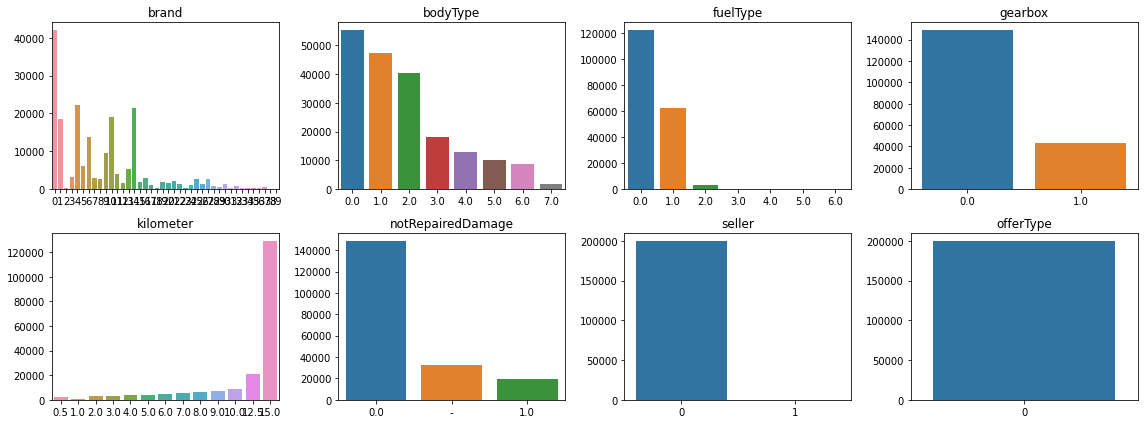

In [5]:
#查看train_data和test_data分布情况
plt.figure()
plt.figure(figsize=(16, 6))
i = 1
for fea in category_feature:
    if all_data[fea].nunique()<50:
        plt.subplot(2, 4, i)
        i += 1
        v = all_data[fea].value_counts()
        fig = sns.barplot(x=v.index, y=v.values)
        plt.title(fea)
plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'Log Normal'}, xlabel='price'>

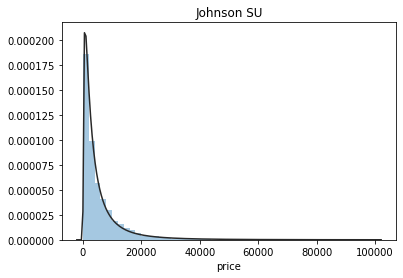

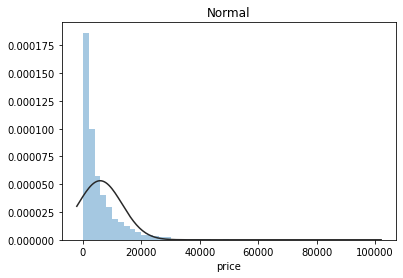

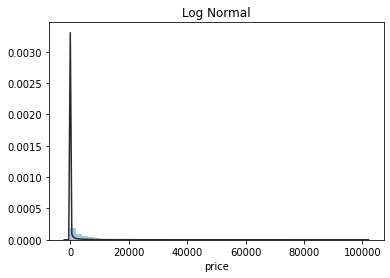

In [6]:
#查看总体label分布,后面label需要做
import scipy.stats as st
y = train_data['price']
plt.figure(1);plt.title('Johnson SU')
sns.distplot(y,kde =False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

<AxesSubplot:xlabel='price', ylabel='Density'>

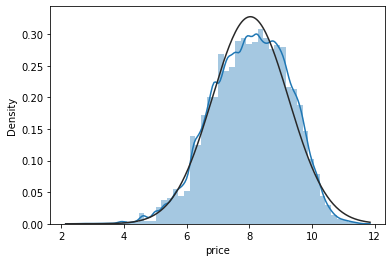

In [7]:
#查看log之后的price分布
plt.figure()
sns.distplot(np.log1p(train_data['price']),fit = st.norm)

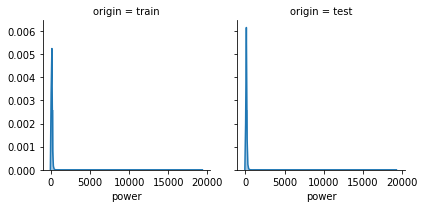

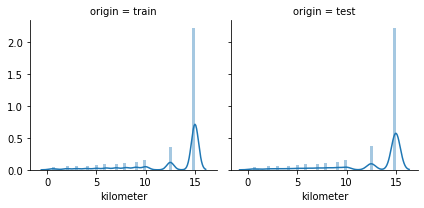

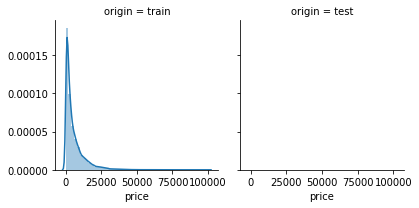

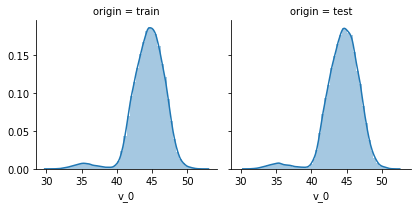

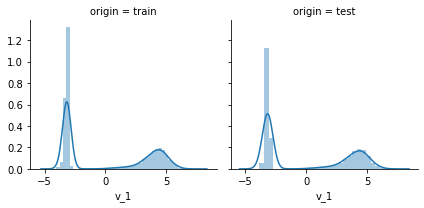

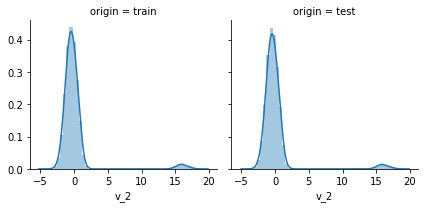

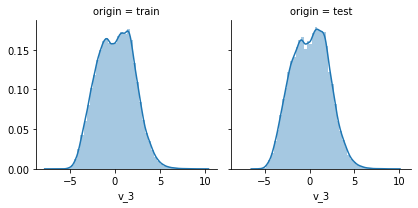

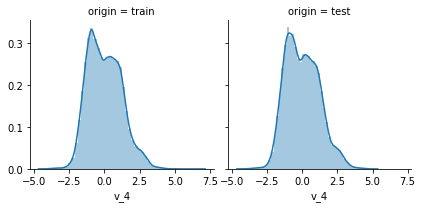

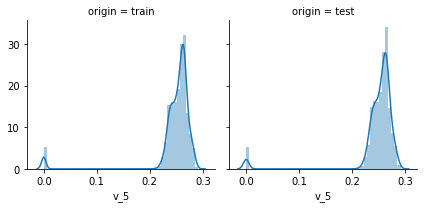

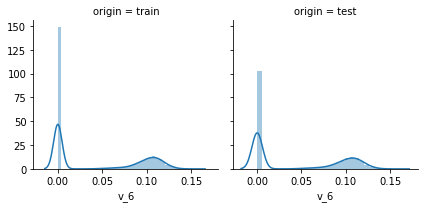

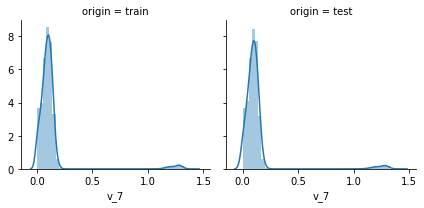

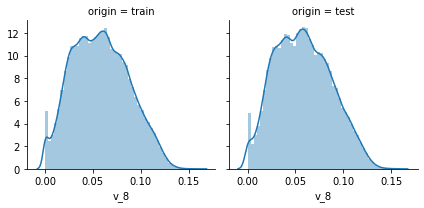

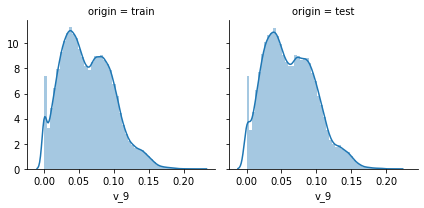

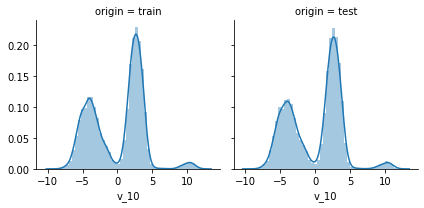

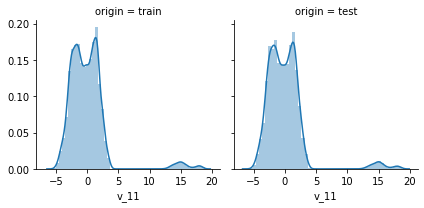

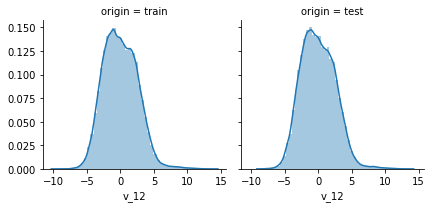

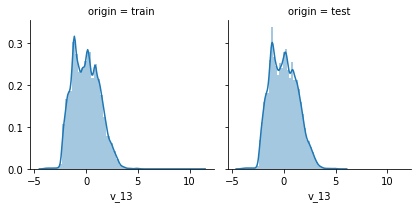

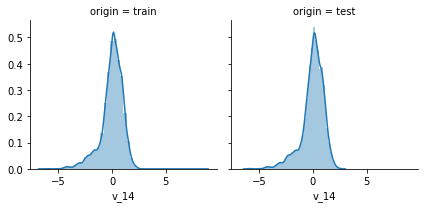

In [8]:
num_fea = ['power', 'kilometer','price','v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14']
for i in num_fea:
    g = sns.FacetGrid(all_data,col = 'origin')
    g = g.map(sns.distplot,i)

<Figure size 432x288 with 0 Axes>

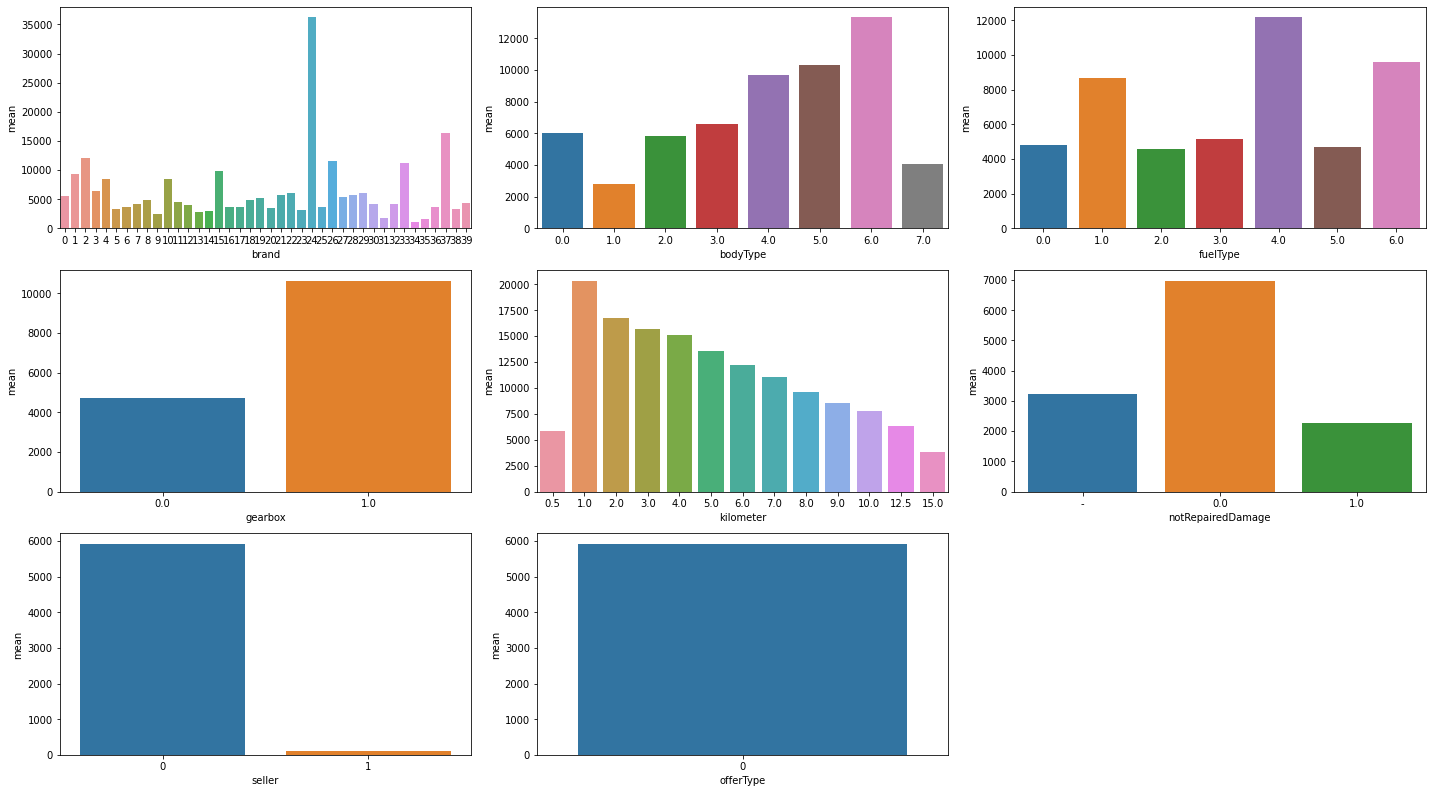

In [9]:
#选取类别特征取值较少的，观察它们与价格的均值分布，其中'kilometer'对价格的影响很明显
plt.figure()
plt.figure(figsize=(20, 18))
i = 1
for f in category_feature:
    if all_data[f].nunique() <= 50:
        plt.subplot(5,3,i)
        i +=1
        k = pd.DataFrame(all_data.groupby([f])['price'].describe()['mean']).reset_index()
        sns.barplot(x = f,y = 'mean',data = k)
plt.tight_layout()
plt.show()

<AxesSubplot:>

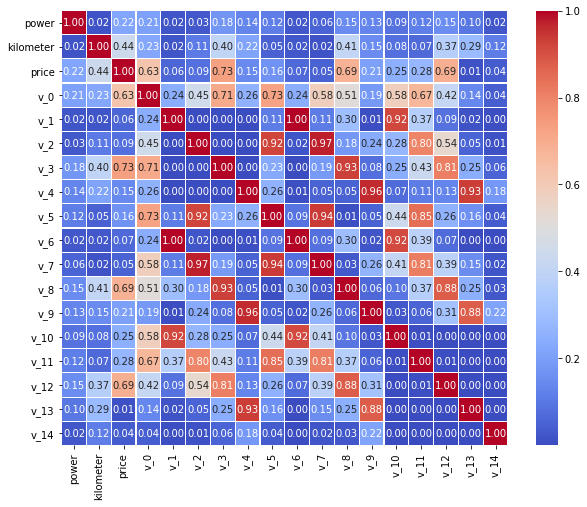

In [10]:
#v_0,v_3,v_8,v_12与price相关性比较高，v_1和v_6相关性为1
#v2和v5、v7相关性高，v4和v9、v12相关性过高
#考虑删除v_1、v_2、v_4
corr = abs(all_data.corr()).loc[num_fea,num_fea]
plt.figure(figsize = (10,8))
sns.heatmap(corr,linewidth = 0.1,annot = True,fmt = '0.2f',cmap = 'coolwarm')

In [ ]:
import pandas_profiling as pp
report = pp.ProfileReport(train_data)
report.to_file('report.html')